<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [2]:
# Read CSV
df = pd.read_csv("Sacramento_transactions.csv")

In [3]:
df

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


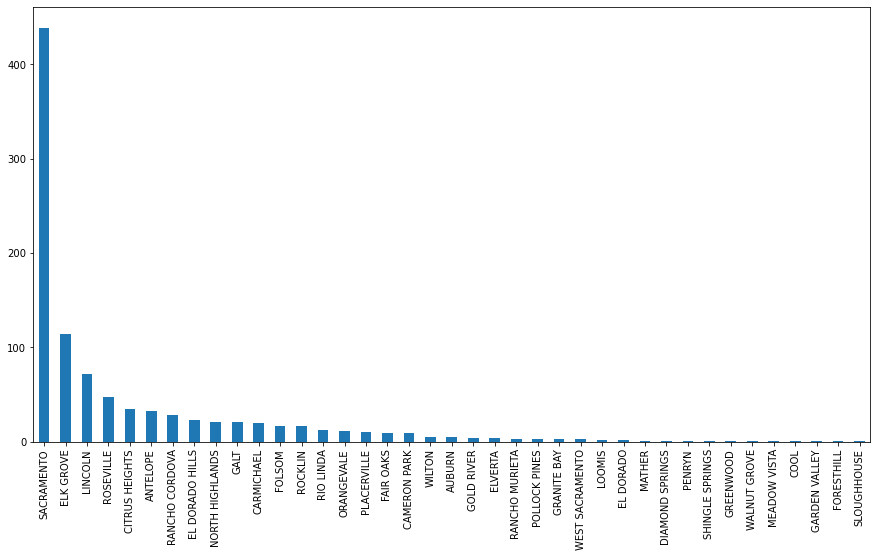

In [4]:
plt.figure(figsize = (15,8))
df.city.value_counts().plot(kind = 'bar')
plt.show()

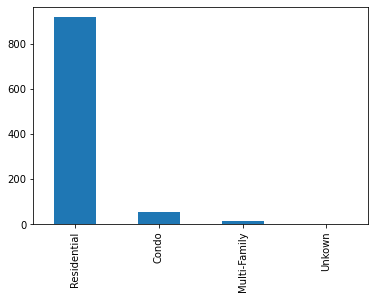

In [5]:
df.type.value_counts().plot(kind = "bar")
plt.show()

Text(0, 0.5, 'baths')

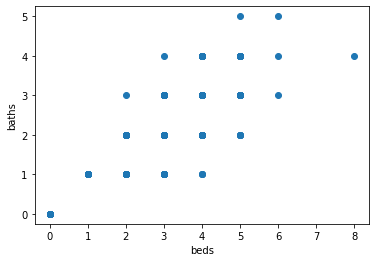

In [6]:
plt.scatter(x = df.beds, y = df.baths)
plt.xlabel('beds')
plt.ylabel('baths')

In [29]:
# create another type ==> plot with 0 beds 
df.loc[df['beds'] == 0, 'type'] = 'Plot'



In [30]:
df.type.unique()

array(['Residential', 'Condo', 'Multi-Family', 'Plot'], dtype=object)

In [7]:
df.groupby('type').agg({'price':[min, max]})

price        
                 min     max
type                        
Condo          40000  360000
Multi-Family  100000  416767
Residential     1551  884790
Unkown        275000  275000

In [8]:
df.price.mean()

234144.26395939087

<AxesSubplot:>

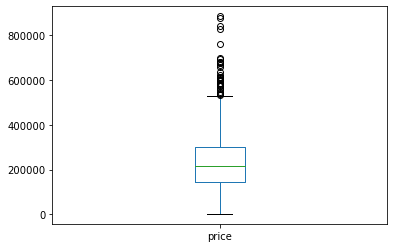

In [9]:
df.price.plot(kind = 'box')

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [10]:
# ANSWER
#Price because its the variable of interest.

#### 2.2 List all possible variables which might be Predictor variable.

In [11]:
# ANSWER

# beds
#baths
#sq_ft
#zip

df.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [12]:
# ANSWER

df.corr()

# Sq__rt is best predictor as it also has a strong corr with bes and baths.


,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [13]:
# ANSWER

df.price.mean()

# mean is always the easies predictor

234144.26395939087

#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [14]:
# ANSWER

df['diff'] = (abs(df.price - df.price.mean())) 

df

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,diff
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,174922.263959
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,165932.263959
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,165264.263959
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,164837.263959
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,152244.263959
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620,1719.263959
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890,144.263959
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803,855.736041
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424,1156.736041


In [15]:
for i in df.price:
    print(abs(i - df.price.mean()))

174922.26395939087
165932.26395939087
165264.26395939087
164837.26395939087
152244.26395939087
144223.26395939087
143249.26395939087
143142.26395939087
139239.26395939087
135207.26395939087
133835.26395939087
127894.26395939087
127292.26395939087
126642.26395939087
125394.26395939087
123444.26395939087
120881.26395939087
117894.26395939087
114144.26395939087
112514.26395939087
112144.26395939087
111462.26395939087
111144.26395939087
110044.26395939087
109144.26395939087
107504.26395939087
106863.26395939087
105144.26395939087
102944.26395939087
102144.26395939087
101144.26395939087
99589.26395939087
97644.26395939087
95394.26395939087
93144.26395939087
87894.26395939087
86836.26395939087
85394.26395939087
84551.26395939087
84144.26395939087
82144.26395939087
80144.26395939087
77248.26395939087
72894.26395939087
72644.26395939087
70144.26395939087
69144.26395939087
67787.26395939087
67787.26395939087
66144.26395939087
64144.26395939087
61144.26395939087
59894.26395939087
59831.263959390

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [16]:
# ANSWER

X = df['sq__ft']
Y = df.price

x_bar = df.sq__ft.mean()
y_bar = df.price.mean()

<AxesSubplot:xlabel='sq__ft', ylabel='price'>

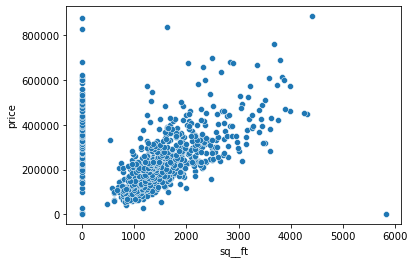

In [17]:
sns.scatterplot( x = df.sq__ft, y = df.price, data = df)

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [18]:
# ANSWER

beta_1 = np.sum((Y - y_bar) *(X - x_bar))/ np.sum(np.square(X - x_bar))
beta_1
  

54.158639688530755

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [19]:
# ANSWER

beta_0 = y_bar - beta_1*x_bar
beta_0

162930.16140699777

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [20]:
# ANSWER

y_hat = beta_0 + beta_1 * X
y_hat

0      208206.784187
1      226133.293924
2      206040.438599
3      209073.322422
4      206094.597239
           ...      
980    286411.859897
981    242922.472227
982    228787.067268
983    254187.469282
984    236694.228663
Name: sq__ft, Length: 985, dtype: float64

##### 2.7.D Find Resudals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [21]:
# ANSWER

residual = abs(Y - y_hat)
residual

0      148984.784187
1      157921.293924
2      137160.438599
3      139766.322422
4      124194.597239
           ...      
980     53986.859897
981      8922.472227
982      6212.932732
983     18886.469282
984       956.228663
Length: 985, dtype: float64

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [22]:
# ANSWER

SStot = np.sum(np.square(Y - y_bar))
SStot

18838783738865.37

In [23]:
SSres = np.sum(np.square(Y - y_hat))
SSres

16738500924917.504

In [24]:
R_square =  1 - (SSres/SStot)
R_square

0.11148717682951459

##### 2.7.F [BONUS] Draw Plot of Predicted Line

Text(0, 0.5, 'y_hat')

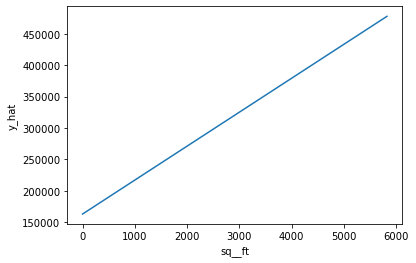

In [25]:
# ANSWER

sns.lineplot(x= df.sq__ft, y = y_hat)
plt.ylabel('y_hat')

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

In [26]:
# ANSWER

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [27]:
# ANSWER

a = 1204
predicted_price = beta_0  + beta_1*a
predicted_price

228137.1635919888



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



